In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
nba_data_file = pd.read_csv("2023-2024 NBA Player Stats - Regular.csv", encoding="ISO-8859-1", delimiter=";")
nba_data_file.tail(5)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
730,568,Thaddeus Young,PF,35,PHO,10,0,8.9,1.1,2.1,...,0.333,1.7,1.1,2.8,0.7,0.5,0.2,0.4,1.1,2.3
731,569,Trae Young,PG,25,ATL,54,54,36.0,8.0,18.7,...,0.855,0.4,2.3,2.8,10.8,1.3,0.2,4.4,2.0,25.7
732,570,Omer Yurtseven,C,25,UTA,48,12,11.4,2.1,3.8,...,0.679,1.5,2.8,4.3,0.6,0.2,0.4,0.8,1.1,4.6
733,571,Cody Zeller,C,31,NOP,43,0,7.4,0.6,1.4,...,0.605,1.1,1.5,2.6,0.9,0.2,0.1,0.4,1.0,1.8
734,572,Ivica Zubac,C,26,LAC,68,68,26.4,5.0,7.6,...,0.723,2.9,6.3,9.2,1.4,0.3,1.2,1.2,2.6,11.7


In [4]:
nba_data_file.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [6]:
describe_value =  nba_data_file[['Age']].describe()
median_value = nba_data_file[['Age']].median()
describe_value.loc['median'] = median_value
describe_value

,Age
count,735.000000
mean,26.155102
std,4.371745
min,19.000000
25%,23.000000
50%,25.000000
75%,29.000000
max,39.000000
median,25.000000


In [7]:
grouped_data = nba_data_file.groupby("Pos", as_index=False).agg(
    Total_Points=("PTS", "sum"),  # Sum of points per position
    Player_Count=("Pos", "count"),  # Count of players per position
)

grouped_data["avg_point_per_player"] = (
    grouped_data["Total_Points"] / grouped_data["Player_Count"]
)

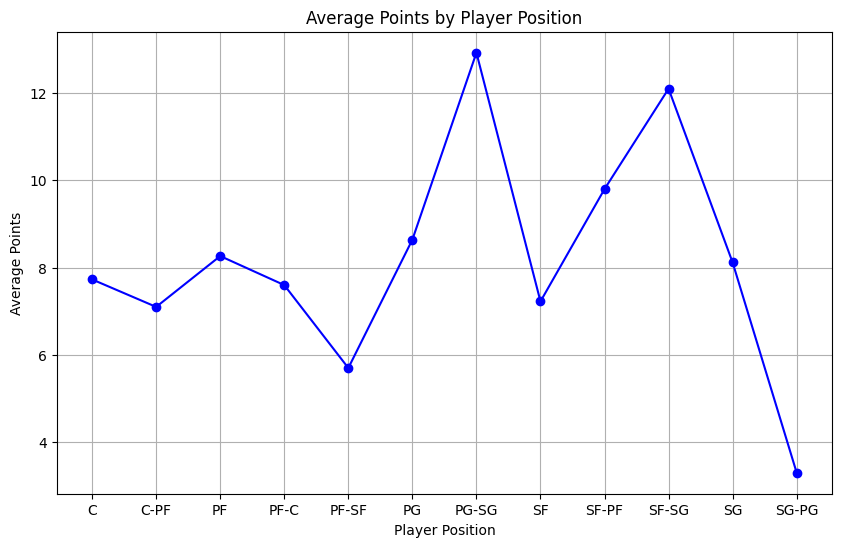

In [8]:
def line_graph_visualisation(df, x_axis, y_axis, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    df_sorted = df.sort_values(by=x_axis)
    
    plt.plot(df_sorted[x_axis], df_sorted[y_axis], marker='o', linestyle='-', color='blue')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

line_graph_visualisation(grouped_data, 'Pos', 'avg_point_per_player',  "Average Points by Player Position", "Player Position", "Average Points")

In [9]:
nba_data_file.describe()

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,...,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000
mean,282.209524,26.155102,40.880272,18.440816,18.264762,2.972789,6.423401,0.442687,0.909116,2.582449,...,0.689493,0.822041,2.423265,3.239184,1.934150,0.587347,0.383946,0.943946,1.456735,8.022313
std,166.858903,4.371745,25.581293,25.024108,9.735524,2.356999,4.783384,0.119501,0.848969,2.166629,...,0.255147,0.732770,1.741203,2.320766,1.800255,0.393774,0.400733,0.758414,0.784284,6.481825
min,1.000000,19.000000,1.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,140.500000,23.000000,17.000000,0.000000,10.600000,1.300000,3.000000,0.400000,0.200000,0.900000,...,0.657500,0.300000,1.100000,1.600000,0.700000,0.300000,0.100000,0.400000,0.900000,3.400000
50%,290.000000,25.000000,41.000000,5.000000,17.200000,2.300000,5.000000,0.446000,0.700000,2.100000,...,0.760000,0.600000,2.100000,2.800000,1.300000,0.500000,0.300000,0.700000,1.400000,6.100000
75%,423.500000,29.000000,64.500000,29.000000,26.450000,4.150000,8.700000,0.500000,1.400000,3.700000,...,0.833000,1.100000,3.350000,4.300000,2.600000,0.800000,0.500000,1.300000,2.000000,11.050000
max,572.000000,39.000000,84.000000,82.000000,37.800000,11.500000,23.600000,0.800000,4.800000,11.800000,...,1.000000,4.600000,10.100000,13.700000,10.900000,2.100000,3.600000,4.400000,3.600000,34.700000


In [11]:
summary_markdown = nba_data_file.describe().to_markdown()

with open('summary_report.md', 'w') as f:
    f.write(summary_markdown)

ImportError: Missing optional dependency 'tabulate'.  Use pip or conda to install tabulate.